This is needed to reload modules without restarting the kernel

In [3]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [4]:
import os
os.sys.path.append('../../')

In [5]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
from hh4b_utils.nnt_tools import load_nnt

# Correlations

Lets calculate the correlations for our dataset

Lets load the fullmassplane data (2016, MDR_VEC, X_wt_tag, 2 Buckets SR shifted)

In [7]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         65G         53G        279M        6.9G         58G
Swap:           15G        4.2G         11G


In [8]:
file_path = "/mnt/storage/lborgna/NNT/MDR_VEC/mc/mc16a_2b_shiftKR_lshi.root"

In [9]:
f = uproot.open(file_path)

In [10]:
df = load_nnt(file_path, trees=['fullmassplane'])

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [12]:
df = df[~df['pass_vbf_sel']].reset_index(drop=True)

In [13]:
df['dEta_hh']

0         0.788580
1         0.720438
2         0.123500
3         0.302964
4         0.967097
            ...   
109284    0.556951
109285    0.998118
109286    1.157442
109287    1.439469
109288    0.596724
Name: dEta_hh, Length: 109289, dtype: float32

In [14]:
df.columns

Index(['run_number', 'event_number', 'pass_vbf_sel', 'mc_sf', 'trig_sf',
       'jet_trig_sfs', 'truth_mhh', 'ntag', 'njets', 'kinematic_region',
       'm_min_dj', 'm_max_dj', 'pairing_score_1', 'pairing_score_2',
       'bkt_lead_jet_pt', 'bkt_third_lead_jet_pt', 'bkt_HT', 'bucket_passed',
       'cos_theta_star', 'm_hh_cor', 'm_hh', 'pt_hh', 'dEta_hh', 'X_wt_tag',
       'X_wt_notag', 'X_wt_nonHCWjets', 'trig_bucket', 'm_h1', 'E_h1', 'pT_h1',
       'eta_h1', 'phi_h1', 'm_h2', 'E_h2', 'pT_h2', 'eta_h2', 'phi_h2',
       'm_h1_j1', 'E_h1_j1', 'pT_h1_j1', 'eta_h1_j1', 'phi_h1_j1', 'tag_h1_j1',
       'quantile_h1_j1', 'angle_h1_j1', 'm_h1_j2', 'E_h1_j2', 'pT_h1_j2',
       'eta_h1_j2', 'phi_h1_j2', 'tag_h1_j2', 'quantile_h1_j2', 'angle_h1_j2',
       'm_h2_j1', 'E_h2_j1', 'pT_h2_j1', 'eta_h2_j1', 'phi_h2_j1', 'tag_h2_j1',
       'quantile_h2_j1', 'angle_h2_j1', 'm_h2_j2', 'E_h2_j2', 'pT_h2_j2',
       'eta_h2_j2', 'phi_h2_j2', 'tag_h2_j2', 'quantile_h2_j2', 'angle_h2_j2',
       'pT_4

In [80]:
features = ['m_hh','Xhh','dEta_hh','njets','X_wt_tag','cos_theta_star','X_wt_notag','bkt_HT','pt_hh','pT_2','pT_4','eta_i','dRjj_1','dRjj_2']

In [81]:
import itertools
combinations = list(itertools.product(features,features))

In [82]:
for xi, yi in combinations:
    print(xi, yi)

m_hh m_hh
m_hh Xhh
m_hh dEta_hh
m_hh njets
m_hh X_wt_tag
m_hh cos_theta_star
m_hh X_wt_notag
m_hh bkt_HT
m_hh pt_hh
m_hh pT_2
m_hh pT_4
m_hh eta_i
m_hh dRjj_1
m_hh dRjj_2
Xhh m_hh
Xhh Xhh
Xhh dEta_hh
Xhh njets
Xhh X_wt_tag
Xhh cos_theta_star
Xhh X_wt_notag
Xhh bkt_HT
Xhh pt_hh
Xhh pT_2
Xhh pT_4
Xhh eta_i
Xhh dRjj_1
Xhh dRjj_2
dEta_hh m_hh
dEta_hh Xhh
dEta_hh dEta_hh
dEta_hh njets
dEta_hh X_wt_tag
dEta_hh cos_theta_star
dEta_hh X_wt_notag
dEta_hh bkt_HT
dEta_hh pt_hh
dEta_hh pT_2
dEta_hh pT_4
dEta_hh eta_i
dEta_hh dRjj_1
dEta_hh dRjj_2
njets m_hh
njets Xhh
njets dEta_hh
njets njets
njets X_wt_tag
njets cos_theta_star
njets X_wt_notag
njets bkt_HT
njets pt_hh
njets pT_2
njets pT_4
njets eta_i
njets dRjj_1
njets dRjj_2
X_wt_tag m_hh
X_wt_tag Xhh
X_wt_tag dEta_hh
X_wt_tag njets
X_wt_tag X_wt_tag
X_wt_tag cos_theta_star
X_wt_tag X_wt_notag
X_wt_tag bkt_HT
X_wt_tag pt_hh
X_wt_tag pT_2
X_wt_tag pT_4
X_wt_tag eta_i
X_wt_tag dRjj_1
X_wt_tag dRjj_2
cos_theta_star m_hh
cos_theta_star Xhh
cos_thet

In [54]:
def Xhh(m1, m2, m_h1_center=120, m_h2_center=110):
    return np.sqrt(
        ((m1 - m_h1_center) / (0.1 * m1)) ** 2 + ((m2 - m_h2_center) / (0.1 * m2)) ** 2
    )

In [55]:
df['Xhh'] = Xhh(df.m_h1, df.m_h2, m_h1_center=124, m_h2_center=117)

In [56]:
from statsmodels.stats.weightstats import DescrStatsW

In [57]:
mask_sr = df['kinematic_region'] == 0

In [83]:
d1 = DescrStatsW(df.loc[mask_sr, features], weights=df.loc[mask_sr,'mc_sf'].values)

In [84]:
corr_df = pd.DataFrame(d1.corrcoef, columns = features,index=features)

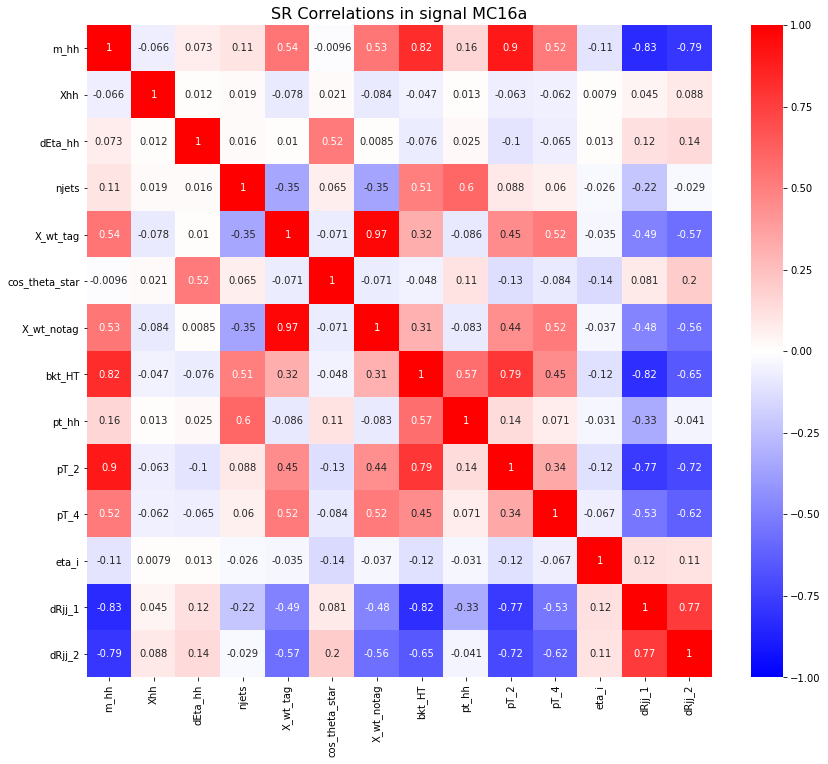

In [85]:
plt.subplots(figsize=(14,12))
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.title('SR Correlations in signal MC16a', fontsize = 16)
plt.savefig('SR_correlations_mc_reweighted.pdf', dpi=600, bbox_inches='tight')

In [62]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_2B_SRshift_16_NN_100_bootstraps.root

-rw-r--r-- 1 lborgna users 509M Apr 22 04:01 /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_2B_SRshift_16_NN_100_bootstraps.root


In [63]:
data = load_nnt('/mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_2B_SRshift_16_NN_100_bootstraps.root', trees=['control','validation','sig'])

100%|██████████| 141/141 [00:26<00:00,  5.32it/s]


In [64]:
from hh4b_utils.nnt_tools import get_mu,w_col

In [65]:
f = uproot.open('/mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_2B_SRshift_16_NN_100_bootstraps.root')

In [66]:
norm = get_mu(f)

In [67]:
mask_data_sr = data['kinematic_region'] == 0
mask_data_2b = data['ntag']==2

In [68]:
w_col(16)

'NN_d24_weight_bstrap_med_16'

In [69]:
data['Xhh'] = Xhh(data['m_h1'], data['m_h2'], m_h1_center=124, m_h2_center=117)

In [90]:
data_r = data.loc[mask_data_sr & mask_data_2b]
d2 = DescrStatsW(
    data_r[features],
    weights=norm *  data_r["NN_d24_weight_bstrap_med_16"].values,
)

In [91]:
corr_data_df = pd.DataFrame(d2.corrcoef, columns = features,index=features)

In [92]:
corr_data_df

m_hh       Xhh   dEta_hh     njets  X_wt_tag  \
m_hh            1.000000  0.008333  0.159714  0.055961  0.490694   
Xhh             0.008333  1.000000 -0.001426 -0.005431 -0.002435   
dEta_hh         0.159714 -0.001426  1.000000 -0.021752  0.051966   
njets           0.055961 -0.005431 -0.021752  1.000000 -0.382423   
X_wt_tag        0.490694 -0.002435  0.051966 -0.382423  1.000000   
cos_theta_star -0.006122  0.006732  0.409918  0.093513 -0.073367   
X_wt_notag      0.424215 -0.003548  0.040788 -0.438507  0.896075   
bkt_HT          0.795792 -0.001728 -0.044802  0.517275  0.224013   
pt_hh           0.091383 -0.000059 -0.026358  0.544464 -0.129204   
pT_2            0.883307  0.000464 -0.032261  0.079631  0.430902   
pT_4            0.530271  0.001240 -0.024287 -0.005283  0.448873   
eta_i          -0.106554  0.003211 -0.005720 -0.073707 -0.011477   
dRjj_1         -0.602447 -0.007784  0.039945 -0.285820 -0.273312   
dRjj_2         -0.735413  0.033282  0.060345  0.013310 -0.464022   

                cos_theta_star  X_wt_notag    bkt_HT     pt_hh      pT_2  \
m_hh                 -0.006122    0.424215  0.795792  0.091383  0.883307   
Xhh                   0.006732   -0.003548 -0.001728 -0.000059  0.000464   
dEta_hh               0.409918    0.040788 -0.044802 -0.026358 -0.032261   
njets                 0.093513   -0.438507  0.517275  0.544464  0.079631   
X_wt_tag             -0.073367    0.896075  0.224013 -0.129204  0.430902   
cos_theta_star        1.000000   -0.083989 -0.025048  0.162969 -0.110505   
X_wt_notag           -0.083989    1.000000  0.148724 -0.168342  0.373926   
bkt_HT               -0.025048    0.148724  1.000000  0.483150  0.800928   
pt_hh                 0.162969   -0.168342  0.483150  1.000000  0.143488   
pT_2                 -0.110505    0.373926  0.800928  0.143488  1.000000   
pT_4                 -0.101201    0.414446  0.451027  0.027708  0.381530   
eta_i                -0.075784    0.003392 -0.166809 -0.084240 -0.144009   
dRjj_1               -0.050485   -0.209641 -0.722777 -0.441024 -0.627283   
dRjj_2                0.246935   -0.430111 -0.595095  0.032016 -0.688235   

                    pT_4     eta_i    dRjj_1    dRjj_2  
m_hh            0.530271 -0.106554 -0.602447 -0.735413  
Xhh             0.001240  0.003211 -0.007784  0.033282  
dEta_hh        -0.024287 -0.005720  0.039945  0.060345  
njets          -0.005283 -0.073707 -0.285820  0.013310  
X_wt_tag        0.448873 -0.011477 -0.273312 -0.464022  
cos_theta_star -0.101201 -0.075784 -0.050485  0.246935  
X_wt_notag      0.414446  0.003392 -0.209641 -0.430111  
bkt_HT          0.451027 -0.166809 -0.722777 -0.595095  
pt_hh           0.027708 -0.084240 -0.441024  0.032016  
pT_2            0.381530 -0.144009 -0.627283 -0.688235  
pT_4            1.000000 -0.086108 -0.391113 -0.584650  
eta_i          -0.086108  1.000000  0.143814  0.117408  
dRjj_1         -0.391113  0.143814  1.000000  0.454885  
dRjj_2         -0.584650  0.117408  0.454885  1.000000

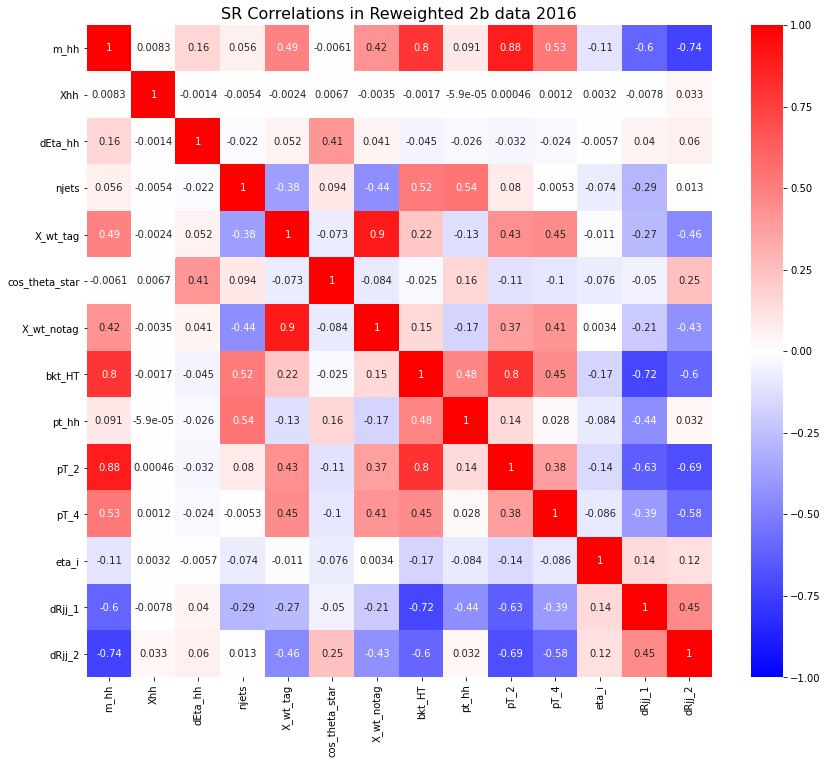

In [93]:
plt.subplots(figsize=(14,12))
heatmap = sns.heatmap(corr_data_df, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.title('SR Correlations in Reweighted 2b data 2016', fontsize = 16)
plt.savefig('SR_correlations_data_2b_reweighted.pdf', dpi=600, bbox_inches='tight')

### Reduced space

In [111]:
features_reduced = ['m_hh','Xhh','dEta_hh','njets','X_wt_tag','eta_i']

In [112]:
scorr = DescrStatsW(df.loc[mask_sr, features_reduced], weights=df.loc[mask_sr,'mc_sf'].values)

In [113]:
scorr

In [114]:
sig_corr = pd.DataFrame(scorr.corrcoef, columns = features_reduced,index=features_reduced)

In [115]:
dcorr = DescrStatsW(
    data_r[features_reduced],
    weights=norm *  data_r["NN_d24_weight_bstrap_med_16"].values,
)

In [116]:
bkg_corr = pd.DataFrame(dcorr.corrcoef, columns = features_reduced, index=features_reduced)

Text(0.5, 1.0, 'Signal SR correlations')

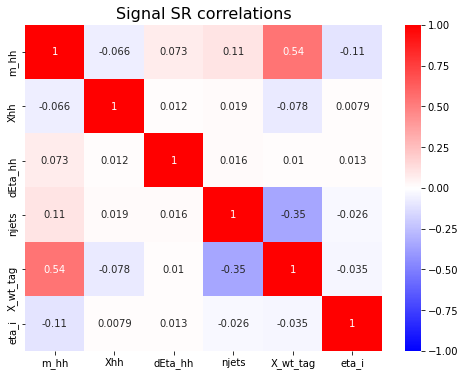

In [117]:
plt.subplots(figsize=(8,6))
heatmap = sns.heatmap(sig_corr, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.title('Signal SR correlations', fontsize = 16)


Text(0.5, 1.0, 'Background SR correlations')

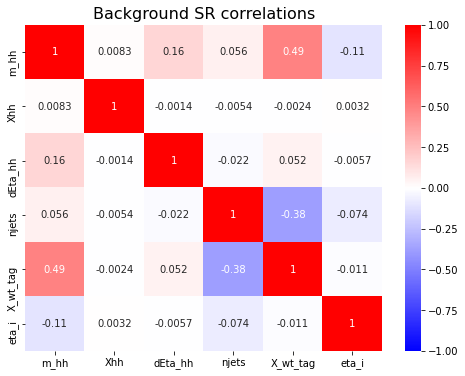

In [118]:
plt.subplots(figsize=(8,6))
heatmap = sns.heatmap(bkg_corr, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.title('Background SR correlations', fontsize = 16)


In [48]:
df[features].corr()

Xhh   dEta_hh     njets  X_wt_tag
Xhh       1.000000  0.063848 -0.005457 -0.099601
dEta_hh   0.063848  1.000000  0.014662  0.036927
njets    -0.005457  0.014662  1.000000 -0.296669
X_wt_tag -0.099601  0.036927 -0.296669  1.000000

In [53]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [56]:
corr(df['Xhh'],df['X_wt_tag'],df['mc_sf'])

-0.09703454906947562